In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

### Create function to extract frames from a video file

In [2]:
# https://docs.opencv.org/4.x/d8/dfe/classcv_1_1VideoCapture.html

def frame_extract(filepath):
    frames = []

    # begin reading from video
    capture = cv2.VideoCapture(filepath)
    if not capture.isOpened():
        print("Cannot open file")
        exit()
    while True:
        retval, image = capture.read()
        if not retval:
            break
        frames.append(image)

    # stop reading from video
    capture.release()

    return frames


#### Verify that the correct amount of frames are extracted

In [ ]:
test_filepath = './dataset/Pointing/Day/Plain/Pointing_plain_front_30fps_day.mp4'
test_frames = frame_extract(test_filepath)
print(len(test_frames)) # 83 total

83


#### Display example frames from image sequence

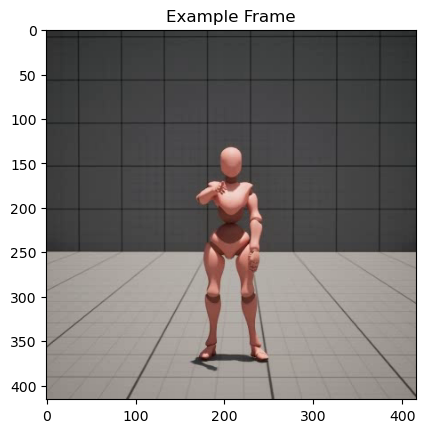

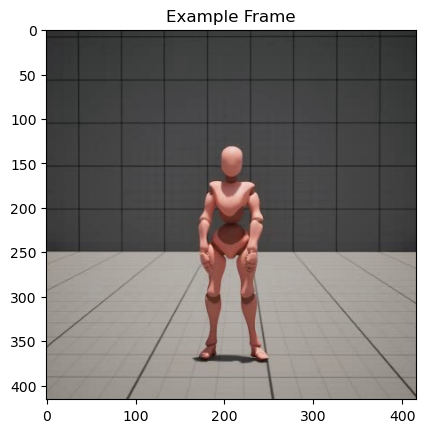

In [17]:
example_frame = cv2.cvtColor(test_frames[48], cv2.COLOR_BGR2RGB)

plt.imshow(example_frame)
plt.title('Example Frame')
plt.show()

example_frame2 = cv2.cvtColor(test_frames[80], cv2.COLOR_BGR2RGB)
plt.imshow(example_frame2)
plt.title('Example Frame')
plt.show()

### Define dataset with PyTorch

In [ ]:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
from torch.utils.data import Dataset

class DistressActionDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.labels = []
        self.videos = []
        #self.transform = transform

        # add all mp4's to 'videos', and appropriate label (as filepaths) to 'labels'
        # Labels: Holding_Something_In_Pain, Injured_Walk, Jumping, Pointing, Running, Waving
        for label_folder in os.listdir(root):
            label_filepath = os.path.join(root, label_folder)
            # Times: Day, Night
            for time_folder in os.listdir(label_filepath):
                time_filepath = os.path.join(label_filepath, time_folder)
                # Environments: Rural, Plain, Grassy
                for env_folder in os.listdir(time_filepath):
                    env_filepath = os.path.join(time_filepath, env_folder)
                    # Direction: Right, Left, Front, Back
                    for video in os.list(env_filepath):
                        if video.endswith(".mp4"):
                            video_file = os.path.join(env_filepath, video)
                            self.sequences.append(video_file)
                            self.labels.append(label_folder)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        video_path = self.videos[idx]
        label = self.labels[idx]

        frames = frame_extract(video_path)

        # handle transforms later
        #if self.transform:
        #    frames = self.transform(frames)
        
        return frames, label